In [1]:
import os,librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers as opt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
import pandas as pd

In [2]:
seed=42
n_MFCC=25
column_names= ['MFCC_'+str(i) for i in range(1,n_MFCC+1)]

In [3]:
DATA_PATH="/home/rakibul/WORK/Work/Thesis/Speech_Recognition/Vowel_Word/GitHub Repo/Vowel_Data/Vowel/"

In [4]:
def get_mfcc(file_path):
    wave, sr= librosa.load(file_path, mono=True, sr=None)
    mfcc=librosa.feature.mfcc(wave,sr=sr,n_mfcc=n_MFCC)
    mfcc_df=pd.DataFrame(mfcc.T,columns=column_names) #convert array to pandas df
    return mfcc_df

def get_all_mfcc(path=DATA_PATH):
    labels=sorted(os.listdir(path))
    all_mfcc=pd.DataFrame() #empty dataframe to store all_mfccs
    
    for label_index,label in enumerate(labels):
        folder_mfcc=pd.DataFrame() #empty dataframe to store mfcc of indivuals vowels/words i.e. folders

        speech_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
        for file in tqdm(speech_files,"Reading Speech of label -'{}'".format(label)):
            #print(file)
            individual_mfcc=get_mfcc(file_path=file)
            folder_mfcc=folder_mfcc.append(individual_mfcc,ignore_index=True)
        
        folder_mfcc['label']=label_index  #new columns for encoding label
        
        all_mfcc=all_mfcc.append(folder_mfcc,ignore_index=True)
        
    return all_mfcc

def get_train_test(split_ratio=0.8,random_state=42):
    all_mfccs=get_all_mfcc()
    
    y=all_mfccs['label'].values
    
    only_mfcc=all_mfccs.drop(labels=['label'],axis=1)
    standard_mfcc=(only_mfcc-only_mfcc.mean())/only_mfcc.std()
    X=standard_mfcc.values

    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True,stratify=y)

In [5]:
X_train, X_test, y_train, y_test=get_train_test()
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

Reading Speech of label -'vowel7': 100%|██████████| 40/40 [00:00<00:00, 116.55it/s]


In [6]:
np.random.seed(seed)
model_v=Sequential()
model_v.add(Dense(128, activation='tanh',input_shape=(X_train.shape[1],)))
model_v.add(Dense(128, activation='tanh'))
model_v.add(Dense(64, activation='tanh'))
model_v.add(Dense(32, activation='tanh'))
model_v.add(Dense(16, activation='tanh'))
model_v.add(Dense(7, activation='softmax'))

In [7]:
model_v.compile(
    optimizer=opt.Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    #metrics=['AUC']
)

In [8]:
history_v=model_v.fit(X_train, y_train_hot, epochs=300, batch_size=X_train.shape[0], validation_data=(X_test,y_test_hot))

Epoch 1/300
1/1 [==============================] - 0s 262ms/step - loss: 2.1057 - accuracy: 0.1555 - val_loss: 1.4784 - val_accuracy: 0.5484
Epoch 2/300
1/1 [==============================] - 0s 43ms/step - loss: 1.4765 - accuracy: 0.5572 - val_loss: 1.2254 - val_accuracy: 0.6884
Epoch 3/300
1/1 [==============================] - 0s 160ms/step - loss: 1.2211 - accuracy: 0.6855 - val_loss: 1.0870 - val_accuracy: 0.7395
Epoch 4/300
1/1 [==============================] - 0s 48ms/step - loss: 1.0792 - accuracy: 0.7388 - val_loss: 0.9963 - val_accuracy: 0.7537
Epoch 5/300
1/1 [==============================] - 0s 47ms/step - loss: 0.9867 - accuracy: 0.7538 - val_loss: 0.9332 - val_accuracy: 0.7558
Epoch 6/300
1/1 [==============================] - 0s 44ms/step - loss: 0.9231 - accuracy: 0.7630 - val_loss: 0.8822 - val_accuracy: 0.7600
Epoch 7/300
1/1 [==============================] - 0s 53ms/step - loss: 0.8721 - accuracy: 0.7738 - val_loss: 0.8377 - val_accuracy: 0.7684
Epoch 8/300
1/1 [=

1/1 [==============================] - 0s 38ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9874
Epoch 118/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0595 - val_accuracy: 0.9874
Epoch 119/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0594 - val_accuracy: 0.9874
Epoch 120/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0593 - val_accuracy: 0.9879
Epoch 121/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0591 - val_accuracy: 0.9879
Epoch 122/300
1/1 [==============================] - 0s 36ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0590 - val_accuracy: 0.9879
Epoch 123/300
1/1 [==============================] - 0s 35ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9879
Epoch 124/300
1/1 [=

Epoch 175/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9884
Epoch 176/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9884
Epoch 177/300
1/1 [==============================] - 0s 36ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9884
Epoch 178/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9884
Epoch 179/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9884
Epoch 180/300
1/1 [==============================] - 0s 36ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9884
Epoch 181/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9884
Epoch 

Epoch 233/300
1/1 [==============================] - 0s 43ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9879
Epoch 234/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9879
Epoch 235/300
1/1 [==============================] - 0s 67ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9879
Epoch 236/300
1/1 [==============================] - 0s 66ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9879
Epoch 237/300
1/1 [==============================] - 0s 50ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9879
Epoch 238/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0571 - val_accuracy: 0.9879
Epoch 239/300
1/1 [==============================] - 0s 38ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0571 - val_accuracy: 0.9879
Epoch 

Epoch 291/300
1/1 [==============================] - 0s 59ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 0.9884
Epoch 292/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 0.9884
Epoch 293/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 0.9884
Epoch 294/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 0.9884
Epoch 295/300
1/1 [==============================] - 0s 43ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0579 - val_accuracy: 0.9884
Epoch 296/300
1/1 [==============================] - 0s 36ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0579 - val_accuracy: 0.9884
Epoch 297/300
1/1 [==============================] - 0s 36ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0579 - val_accuracy: 0.9884
Epoch 

In [9]:
history_dict_v=history_v.history

loss_v=history_dict_v['loss']
val_loss_v=history_dict_v['val_loss']

#auc_v=history_dict['auc']
#val_auc_v=history_dict['val_auc']

acc_v=history_dict_v['accuracy']
val_acc_v=history_dict_v['val_accuracy']

In [10]:
epochs=range(1,len(loss_v)+1)
ticks=[1]
ticks2=[i for i in range(30,len(loss_v)+1,30)]
ticks.extend(ticks2)

In [11]:
save_specifier='standard_mfcc_128_128_64_32_16_tanh_softmax_adam_005_batchfull_seed42_diff_styles'

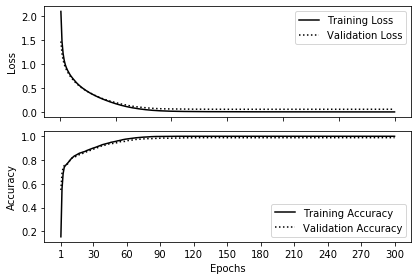

In [58]:
fig=plt.figure()
ax1=plt.subplot(211)
ax2=plt.subplot(212)

ax1.plot(epochs,loss_v,'k', label='Training Loss')
ax1.plot(epochs,val_loss_v,'k:', label='Validation Loss')
ax1.set_ylabel('Loss')
ax1.legend()


ax2.plot(epochs,acc_v,'k', label='Training Accuracy')
ax2.plot(epochs,val_acc_v,'k:', label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_xticks(ticks)
ax2.legend()

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

plt.tight_layout()
plt.savefig('/home/rakibul/WORK/Work/Thesis/Speech_Recognition/Vowel_Word/GitHub Repo/Result/New_without_CNN/loss_auc_vowel_'+save_specifier+'.pdf',format='pdf', dpi=600)

In [59]:
DATA_PATH="/home/rakibul/WORK/Work/Thesis/Speech_Recognition/Vowel_Word/GitHub Repo/Word_Data/Word/"

In [60]:
def get_mfcc(file_path):
    wave, sr= librosa.load(file_path, mono=True, sr=None)
    mfcc=librosa.feature.mfcc(wave,sr=sr,n_mfcc=n_MFCC)
    mfcc_df=pd.DataFrame(mfcc.T,columns=column_names) #convert array to pandas df
    return mfcc_df

def get_all_mfcc(path=DATA_PATH):
    labels=sorted(os.listdir(path))
    all_mfcc=pd.DataFrame() #empty dataframe to store all_mfccs
    
    for label_index,label in enumerate(labels):
        folder_mfcc=pd.DataFrame() #empty dataframe to store mfcc of indivuals vowels/words i.e. folders

        speech_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
        for file in tqdm(speech_files,"Reading Speech of label -'{}'".format(label)):
            #print(file)
            individual_mfcc=get_mfcc(file_path=file)
            folder_mfcc=folder_mfcc.append(individual_mfcc,ignore_index=True)
        
        folder_mfcc['label']=label_index  #new columns for encoding label
        
        all_mfcc=all_mfcc.append(folder_mfcc,ignore_index=True)
        
    return all_mfcc

def get_train_test(split_ratio=0.8,random_state=42):
    all_mfccs=get_all_mfcc()
    
    y=all_mfccs['label'].values
    
    only_mfcc=all_mfccs.drop(labels=['label'],axis=1)
    standard_mfcc=(only_mfcc-only_mfcc.mean())/only_mfcc.std()
    X=standard_mfcc.values

    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True,stratify=y)

In [61]:
X_train, X_test, y_train, y_test=get_train_test()
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

Reading Speech of label -'Word7': 100%|██████████| 40/40 [00:00<00:00, 121.57it/s]


In [62]:
np.random.seed(seed)
model_w=Sequential()
model_w.add(Dense(128, activation='tanh',input_shape=(X_train.shape[1],)))
model_w.add(Dense(128, activation='tanh'))
model_w.add(Dense(64, activation='tanh'))
model_w.add(Dense(32, activation='tanh'))
model_w.add(Dense(16, activation='tanh'))
model_w.add(Dense(7, activation='softmax'))

In [63]:
model_w.compile(
    optimizer=opt.Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    #metrics=['AUC']
)

In [64]:
history_w=model_w.fit(X_train, y_train_hot, epochs=300, batch_size=X_train.shape[0], validation_data=(X_test,y_test_hot))

Epoch 1/300
1/1 [==============================] - 0s 158ms/step - loss: 1.9658 - accuracy: 0.1808 - val_loss: 1.6024 - val_accuracy: 0.4002
Epoch 2/300
1/1 [==============================] - 0s 69ms/step - loss: 1.6102 - accuracy: 0.3887 - val_loss: 1.5005 - val_accuracy: 0.4314
Epoch 3/300
1/1 [==============================] - 0s 58ms/step - loss: 1.5081 - accuracy: 0.4238 - val_loss: 1.4459 - val_accuracy: 0.4575
Epoch 4/300
1/1 [==============================] - 0s 48ms/step - loss: 1.4510 - accuracy: 0.4543 - val_loss: 1.4070 - val_accuracy: 0.4755
Epoch 5/300
1/1 [==============================] - 0s 46ms/step - loss: 1.4084 - accuracy: 0.4759 - val_loss: 1.3774 - val_accuracy: 0.4916
Epoch 6/300
1/1 [==============================] - 0s 52ms/step - loss: 1.3761 - accuracy: 0.4941 - val_loss: 1.3551 - val_accuracy: 0.5040
Epoch 7/300
1/1 [==============================] - 0s 47ms/step - loss: 1.3514 - accuracy: 0.5039 - val_loss: 1.3346 - val_accuracy: 0.5144
Epoch 8/300
1/1 [==

1/1 [==============================] - 0s 41ms/step - loss: 0.0631 - accuracy: 0.9911 - val_loss: 0.3004 - val_accuracy: 0.9050
Epoch 118/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0602 - accuracy: 0.9935 - val_loss: 0.3015 - val_accuracy: 0.9062
Epoch 119/300
1/1 [==============================] - 0s 78ms/step - loss: 0.0580 - accuracy: 0.9938 - val_loss: 0.3084 - val_accuracy: 0.9050
Epoch 120/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0571 - accuracy: 0.9929 - val_loss: 0.2991 - val_accuracy: 0.9062
Epoch 121/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0549 - accuracy: 0.9945 - val_loss: 0.2995 - val_accuracy: 0.9058
Epoch 122/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0529 - accuracy: 0.9949 - val_loss: 0.3054 - val_accuracy: 0.9066
Epoch 123/300
1/1 [==============================] - 0s 38ms/step - loss: 0.0519 - accuracy: 0.9945 - val_loss: 0.2982 - val_accuracy: 0.9074
Epoch 124/300
1/1 [=

Epoch 175/300
1/1 [==============================] - 0s 38ms/step - loss: 0.0140 - accuracy: 0.9998 - val_loss: 0.3107 - val_accuracy: 0.9090
Epoch 176/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0137 - accuracy: 0.9998 - val_loss: 0.3110 - val_accuracy: 0.9090
Epoch 177/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0135 - accuracy: 0.9998 - val_loss: 0.3111 - val_accuracy: 0.9090
Epoch 178/300
1/1 [==============================] - 0s 57ms/step - loss: 0.0132 - accuracy: 0.9998 - val_loss: 0.3117 - val_accuracy: 0.9094
Epoch 179/300
1/1 [==============================] - 0s 49ms/step - loss: 0.0130 - accuracy: 0.9998 - val_loss: 0.3121 - val_accuracy: 0.9098
Epoch 180/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0128 - accuracy: 0.9998 - val_loss: 0.3120 - val_accuracy: 0.9090
Epoch 181/300
1/1 [==============================] - 0s 38ms/step - loss: 0.0125 - accuracy: 0.9998 - val_loss: 0.3124 - val_accuracy: 0.9086
Epoch 

Epoch 233/300
1/1 [==============================] - 0s 47ms/step - loss: 0.0060 - accuracy: 0.9999 - val_loss: 0.3229 - val_accuracy: 0.9130
Epoch 234/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0059 - accuracy: 0.9999 - val_loss: 0.3232 - val_accuracy: 0.9134
Epoch 235/300
1/1 [==============================] - 0s 45ms/step - loss: 0.0058 - accuracy: 0.9999 - val_loss: 0.3234 - val_accuracy: 0.9134
Epoch 236/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0058 - accuracy: 0.9999 - val_loss: 0.3237 - val_accuracy: 0.9138
Epoch 237/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0057 - accuracy: 0.9999 - val_loss: 0.3239 - val_accuracy: 0.9130
Epoch 238/300
1/1 [==============================] - 0s 43ms/step - loss: 0.0056 - accuracy: 0.9999 - val_loss: 0.3241 - val_accuracy: 0.9126
Epoch 239/300
1/1 [==============================] - 0s 38ms/step - loss: 0.0056 - accuracy: 0.9999 - val_loss: 0.3242 - val_accuracy: 0.9126
Epoch 

Epoch 291/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.3320 - val_accuracy: 0.9130
Epoch 292/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.3322 - val_accuracy: 0.9130
Epoch 293/300
1/1 [==============================] - 0s 66ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.3323 - val_accuracy: 0.9130
Epoch 294/300
1/1 [==============================] - 0s 51ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.3325 - val_accuracy: 0.9130
Epoch 295/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.3326 - val_accuracy: 0.9130
Epoch 296/300
1/1 [==============================] - 0s 38ms/step - loss: 0.0033 - accuracy: 0.9999 - val_loss: 0.3328 - val_accuracy: 0.9130
Epoch 297/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0033 - accuracy: 0.9999 - val_loss: 0.3329 - val_accuracy: 0.9130
Epoch 

In [67]:
history_dict_w=history_w.history
loss_w=history_dict_w['loss']
val_loss_w=history_dict_w['val_loss']

#auc_w=history_dict['auc']
#val_auc_w=history_dict['val_auc']

acc_w=history_dict_w['accuracy']
val_acc_w=history_dict_w['val_accuracy']

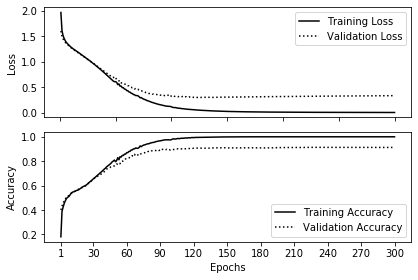

In [68]:
fig=plt.figure()
ax1=plt.subplot(211)
ax2=plt.subplot(212)

ax1.plot(epochs,loss_w,'k', label='Training Loss')
ax1.plot(epochs,val_loss_w,'k:', label='Validation Loss')
ax1.set_ylabel('Loss')
ax1.legend()


ax2.plot(epochs,acc_w,'k', label='Training Accuracy')
ax2.plot(epochs,val_acc_w,'k:', label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_xticks(ticks)
ax2.legend()

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

plt.tight_layout()
plt.savefig('/home/rakibul/WORK/Work/Thesis/Speech_Recognition/Vowel_Word/GitHub Repo/Result/New_without_CNN/loss_auc_word_'+save_specifier+'.pdf',format='pdf', dpi=600)

In [59]:
#COMPARE

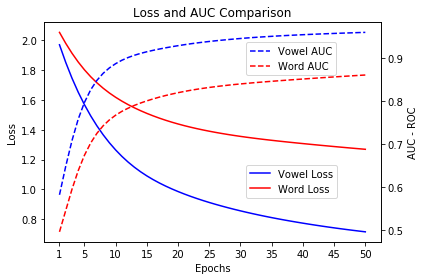

In [60]:
fig, ax=plt.subplots()
ln1=ax.plot(epochs,loss_v,'b', label='Vowel Loss')
ln2=ax.plot(epochs,loss_w,'r', label='Word Loss')

ax2=ax.twinx()
ln3=ax2.plot(epochs,auc_v,'b--', label='Vowel AUC')
ln3=ax2.plot(epochs,auc_w,'r--', label='Word AUC')

ax.set_title('Loss and AUC Comparison')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax2.set_ylabel('AUC - ROC')

plt.xticks(ticks)
ax.legend(loc=(0.6,0.2))
ax2.legend(loc=(0.6,0.76))
#fig.legend(loc=(0.6,0.4))
plt.tight_layout()
plt.savefig('./New_without_CNN/comare_'+save_specifier+'.pdf',format='pdf', dpi=600)

In [61]:
all_compare_df=pd.DataFrame({'loss_v':loss_v,
                      'val_loss_v':val_loss_v,
                      'auc_v':auc_v,
                      'val_auc_v':val_auc_v,
                      'loss_w':loss_w,
                      'val_loss_w':val_loss_w,
                      'auc_w':auc_w,
                      'val_auc_w':val_auc_w
                     })

all_compare_df.to_csv('./New_without_CNN/all_compare_data_'+save_specifier+'.csv')

In [67]:
all_compare_df.tail()

,loss_v,val_loss_v,acc_v,val_acc_v,auc_v,val_auc_v,loss_w,val_loss_w,acc_w,val_acc_w,auc_w,val_auc_w
45,1.087982,1.079178,0.578892,0.576316,0.914252,0.914130,1.465496,1.461363,0.433841,0.435846,0.808475,0.810116
46,1.073246,1.063786,0.580471,0.586316,0.916134,0.916380,1.460930,1.456924,0.435345,0.437049,0.809607,0.811218
47,1.058198,1.051638,0.585735,0.577368,0.918239,0.917834,1.456578,1.452782,0.435445,0.443865,0.810850,0.812264
48,1.043170,1.040124,0.585867,0.578421,0.920454,0.919898,1.452407,1.448659,0.439755,0.447875,0.812117,0.813237
49,1.030735,1.028717,0.590604,0.581053,0.922445,0.921268,1.448298,1.444540,0.444968,0.446672,0.813397,0.814203


In [45]:
all_compare_df.tail()

,loss_v,val_loss_v,acc_v,val_acc_v,auc_v,val_auc_v,loss_w,val_loss_w,acc_w,val_acc_w,auc_w,val_auc_w
45,0.747012,0.753977,0.741413,0.727895,0.960994,0.959738,1.281573,1.291772,0.509824,0.504010,0.859364,0.856465
46,0.740706,0.747679,0.742203,0.727895,0.961514,0.960330,1.277932,1.287836,0.511628,0.503609,0.860304,0.857371
47,0.734629,0.741603,0.743387,0.728421,0.961970,0.960810,1.274361,1.283999,0.512831,0.503609,0.861195,0.858353
48,0.728761,0.735736,0.745493,0.731053,0.962445,0.961305,1.270858,1.280256,0.513031,0.506816,0.862042,0.859321
49,0.723083,0.730062,0.745756,0.734211,0.962883,0.961810,1.267420,1.276603,0.514635,0.510024,0.862903,0.860176


In [28]:
all_compare_df.tail()

,loss_v,val_loss_v,auc_v,val_auc_v,loss_w,val_loss_w,auc_w,val_auc_w
45,0.706936,0.714525,0.963838,0.962377,1.309307,1.312979,0.854070,0.852646
46,0.701005,0.709404,0.964249,0.962680,1.304894,1.309166,0.855060,0.853603
47,0.695289,0.704458,0.964672,0.963047,1.300554,1.305393,0.856125,0.854472
48,0.689775,0.699667,0.965066,0.963378,1.296285,1.301660,0.857146,0.855276
49,0.684449,0.695019,0.965437,0.963702,1.292087,1.297965,0.858121,0.855980


In [62]:
all_compare_df.tail()

,loss_v,val_loss_v,auc_v,val_auc_v,loss_w,val_loss_w,auc_w,val_auc_w
45,0.735822,0.740672,0.958826,0.957656,1.283517,1.293495,0.857910,0.855152
46,0.730334,0.735616,0.959333,0.958082,1.279773,1.289651,0.858789,0.856155
47,0.725022,0.730728,0.959823,0.958516,1.276084,1.285892,0.859699,0.856994
48,0.719872,0.725991,0.960334,0.958967,1.272452,1.282220,0.860599,0.857870
49,0.714867,0.721389,0.960773,0.959409,1.268873,1.278631,0.861462,0.858814
